<a href="https://colab.research.google.com/github/zia207/Python_for_Beginners/blob/main/Notebook/01_04_06_anova_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 4.6 Analysis of Variance (ANOVA)

ANOVA is a statistical technique used to compare the means of three or more groups, widely applied in fields like agriculture, biology, psychology, and social sciences to analyze experimental data and assess the effects of different treatments or factors on a response variable. This tutorial will guide you through performing ANOVA in Python.

## Introduction

Analysis of Variance (ANOVA) is a statistical technique used to compare the means of three or more groups, enabling us to determine whether there are significant differences between them. This method is widely used in research to help us understand whether the differences we observe among group means are due to genuine differences in the populations or simply random sampling variation.

ANOVA works by breaking down the total variance observed in the data into different components: the variance between group means and the variance within each group. It then examines whether the between-group variance is significantly larger than the within-group variance. If it is, this indicates that there are real differences among the groups.

There are various types of ANOVA, including one-way ANOVA, which compares the means of three or more groups on a single independent variable, and two-way ANOVA, which examines the influence of two independent variables. More complex designs, such as factorial ANOVA, can be used for multiple factors.

During ANOVA, an F-statistic is generated, which compares the ratio of the between-group variance to the within-group variance. If the calculated F-value exceeds a critical value based on the chosen significance level, usually 0.05, it suggests that there is a statistically significant difference between at least two group means.

Post-hoc tests, such as Tukey's HSD or Bonferroni correction, are often used after ANOVA to pinpoint which specific groups differ from each other if the overall ANOVA result is significant. It's important to note that ANOVA makes certain assumptions, such as the data following a normal distribution and the groups having equal variances. Violations of these assumptions may affect the reliability of the ANOVA results.

Overall, ANOVA is a powerful tool for comparing means across multiple groups simultaneously. It's commonly used in various fields, such as psychology, biology, economics, and more to analyze experimental or observational data. By comparing group means, ANOVA helps us to understand the differences between groups and identify significant patterns in the data.

Analysis of Variance (ANOVA) is a statistical method to compare the means of three or more groups to determine if there are significant differences among them. It decomposes the total variance in the data into:

1. **Between-Group Variability (SSB)**: Variance due to differences between group means.
2. **Within-Group Variability (SSW)**: Variance due to individual observations within groups.

The key statistic in ANOVA is the **F-statistic**, which compares the ratio of between-group variance to within-group variance. A large F-value suggests significant differences between at least two group means. The formulas are:

1. **Sum of Squares Between (SSB)**:
   $$ SSB = \sum_{i=1}^k n_i (\bar{x}_i - \bar{x}_{\text{grand}})^2 $$
   where $n_i$ is the sample size of group $i$, $\bar{x}_i$ is the mean of group $i$, and $\bar{x}_{\text{grand}}$ is the overall mean.

2. **Sum of Squares Within (SSW)**:
   $$ SSW = \sum_{i=1}^k \sum_{j=1}^{n_i} (x_{ij} - \bar{x}_i)^2 $$

3. **Degrees of Freedom**:
   - Between groups: $df_{\text{between}} = k - 1$
   - Within groups: $df_{\text{within}} = N - k$

4. **Mean Squares**:
   - $MS_{\text{between}} = SSB / df_{\text{between}}$
   - $MS_{\text{within}} = SSW / df_{\text{within}}$

5. **F-Statistic**:
   $$ F = \frac{MS_{\text{between}}}{MS_{\text{within}}} $$

If the F-value exceeds a critical value (based on a significance level, typically 0.05), it indicates significant differences. Post-hoc tests like Tukey's HSD or Bonferroni correction can identify which groups differ. ANOVA assumes:
- **Independence**: Observations are independent across groups.
- **Normality**: Data in each group is approximately normally distributed.
- **Homogeneity of variances**: Equal variances across groups.

## ANOVA from Scratch

### Generate Synthetic Data
We'll create synthetic data with three groups using NumPy.

In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(123)

# Create synthetic data with 3 groups
group1 = np.random.normal(loc=5, scale=1.5, size=10)  # Group 1: mean=5
group2 = np.random.normal(loc=6, scale=1.5, size=10)  # Group 2: mean=6
group3 = np.random.normal(loc=7, scale=1.5, size=10)  # Group 3: mean=7

# Combine into a DataFrame
data = pd.DataFrame({
    'weight': np.concatenate([group1, group2, group3]),
    'group': np.repeat(['Group1', 'Group2', 'Group3'], 10)
})

# View the first few rows
print(data.head())

     weight   group
0  3.371554  Group1
1  6.496018  Group1
2  5.424468  Group1
3  2.740558  Group1
4  4.132100  Group1


### Perform Manual ANOVA
We'll compute the ANOVA components manually.

In [ ]:
# Extract response and group
response = data['weight']
groups = [data[data['group'] == g]['weight'] for g in data['group'].unique()]

# Compute grand mean and group statistics
grand_mean = np.mean(response)
k = len(groups)  # Number of groups (3)
n_total = len(response)  # Total sample size (30)

# Calculate SSB (Between-Group Sum of Squares)
group_means = [np.mean(g) for g in groups]
group_n = [len(g) for g in groups]
ssb = sum(n * (m - grand_mean)**2 for n, m in zip(group_n, group_means))

# Calculate SSW (Within-Group Sum of Squares)
ssw = sum(sum((x - np.mean(g))**2 for x in g) for g in groups)

# Degrees of Freedom
df_between = k - 1  # 3 - 1 = 2
df_within = n_total - k  # 30 - 3 = 27

# Mean Squares
ms_between = ssb / df_between
ms_within = ssw / df_within

# F-Statistic and P-Value
from scipy.stats import f
f_value = ms_between / ms_within
p_value = f.sf(f_value, df_between, df_within)

# Assemble ANOVA Table
anova_table = pd.DataFrame({
    'Source': ['Between Groups', 'Within Groups'],
    'SS': [ssb, ssw],
    'df': [df_between, df_within],
    'MS': [ms_between, ms_within],
    'F': [f_value, np.nan],
    'p-value': [p_value, np.nan]
})
print(anova_table)

           Source         SS  df         MS         F  p-value
0  Between Groups  32.533823   2  16.266912  5.186837  0.01241
1   Within Groups  84.677155  27   3.136191       NaN      NaN


### Validation with Built-in Functions
We can validate using `statsmodels`.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Perform one-way ANOVA
model = ols('weight ~ group', data=data).fit()
anova_results = anova_lm(model)
print(anova_results)

            df     sum_sq    mean_sq         F   PR(>F)
group      2.0  32.533823  16.266912  5.186837  0.01241
Residual  27.0  84.677155   3.136191       NaN      NaN


## ANOVA with Python Packages
We'll use `statsmodels`, `pingouin`, and `seaborn` for ANOVA and visualization.

In [ ]:
import importlib.util
import sys

# List of required packages
packages = ['numpy', 'pandas', 'statsmodels', 'scikit-learn', 'matplotlib', 'seaborn', 'pingouin']

# Check and install missing packages
# Check and install missing packages
for package in packages:
    if not importlib.util.find_spec(package):
        try:
            import pip
            pip.main(['install', package])
        except ImportError:
            print(f"Failed to install {package}. Pip is not available.")

### Install and Import Packages

In [ ]:
# Install required packages
# !pip install statsmodels pingouin seaborn

# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

### Generate Experimental Data
Create a dataset with four treatments, six varieties, and four replications.

In [ ]:
# Set parameters
np.random.seed(1256)
treatments = 4
replications = 4
varieties = 6
n = 1

# Create empty DataFrame
exp_df = pd.DataFrame({
    'Treatment': [],
    'Replication': [],
    'Variety': [],
    'Yield': []
})

# Generate random data
for t in range(1, treatments + 1):
    for r in range(1, replications + 1):
        for v in range(1, varieties + 1):
            obs = np.random.normal(loc=3*t + 0.95*r + 0.90*v, scale=0.25, size=n)
            temp_df = pd.DataFrame({
                'Treatment': [f'T{t}'] * n,
                'Replication': [r] * n,
                'Variety': [f'V{v}'] * n,
                'Yield': obs
            })
            exp_df = pd.concat([exp_df, temp_df], ignore_index=True)

# Print first 10 rows
print(exp_df.head(10))

  Treatment  Replication Variety     Yield
0        T1          1.0      V1  4.963205
1        T1          1.0      V2  5.526794
2        T1          1.0      V3  6.530780
3        T1          1.0      V4  7.648310
4        T1          1.0      V5  8.690360
5        T1          1.0      V6  8.900666
6        T1          2.0      V1  5.507928
7        T1          2.0      V2  6.746754
8        T1          2.0      V3  7.760396
9        T1          2.0      V4  8.616543


## One-way ANOVA
One-way ANOVA tests for differences in means across groups based on one independent variable.

In [ ]:
# Perform one-way ANOVA
anova_one = pg.anova(data=exp_df, dv='Yield', between='Treatment')
print(anova_one)

      Source  ddof1  ddof2         F         p-unc       np2
0  Treatment      3     92  98.52455  1.258580e-28  0.762626


## Two-way ANOVA
Two-way ANOVA examines the effects of two independent variables and their interaction.

In [ ]:
# Perform two-way ANOVA
anova_two = pg.anova(data=exp_df, dv='Yield', between=['Treatment', 'Variety'])
print(anova_two)

                Source           SS  DF          MS           F         p-unc  \
0            Treatment  1082.951150   3  360.983717  238.362631  2.642288e-37   
1              Variety   226.992291   5   45.398458   29.977241  2.450096e-16   
2  Treatment * Variety     1.047134  15    0.069809    0.046096  1.000000e+00   
3             Residual   109.039020  72    1.514431         NaN           NaN   

        np2  
0  0.908524  
1  0.675509  
2  0.009512  
3       NaN  


## Multiple Comparisons
Post-hoc tests identify which specific groups differ after a significant ANOVA result.

### Tukey's HSD Test

In [ ]:
# Tukey's HSD for one-way ANOVA
tukey_one = pg.pairwise_tukey(data=exp_df, dv='Yield', between='Treatment')
print(tukey_one)

# Tukey's HSD for two-way ANOVA (Treatment:Variety interaction)

# Create an interaction column
exp_df['Treatment_Variety'] = exp_df['Treatment'] + '_' + exp_df['Variety']

# Perform Tukey's HSD for the interaction
tukey_two = pg.pairwise_tukey(data=exp_df, dv='Yield', between='Treatment_Variety')
print(tukey_two.head(20))


    A   B    mean(A)    mean(B)      diff        se          T   p-tukey  \
0  T1  T2   8.479180  11.584709 -3.105529  0.552562  -5.620237  0.000001   
1  T1  T3   8.479180  14.493784 -6.014604  0.552562 -10.884941  0.000000   
2  T1  T4   8.479180  17.522423 -9.043244  0.552562 -16.366028  0.000000   
3  T2  T3  11.584709  14.493784 -2.909075  0.552562  -5.264704  0.000005   
4  T2  T4  11.584709  17.522423 -5.937715  0.552562 -10.745791  0.000000   
5  T3  T4  14.493784  17.522423 -3.028640  0.552562  -5.481087  0.000002   

     hedges  
0 -1.649666  
1 -3.025272  
2 -4.699682  
3 -1.478489  
4 -3.120162  
5 -1.508634  
        A      B   mean(A)    mean(B)       diff        se          T  \
0   T1_V1  T1_V2  6.263515   7.189928  -0.926413  0.870181  -1.064621   
1   T1_V1  T1_V3  6.263515   8.042669  -1.779153  0.870181  -2.044578   
2   T1_V1  T1_V4  6.263515   8.967006  -2.703491  0.870181  -3.106814   
3   T1_V1  T1_V5  6.263515   9.801218  -3.537702  0.870181  -4.065478   
4   

### Pairwise t-tests with Bonferroni Correction

In [ ]:
# Pairwise t-tests with Bonferroni correction
pairwise_t = pg.pairwise_tests(data=exp_df, dv='Yield', between='Treatment', padjust='bonf')
print(pairwise_t)

    Contrast   A   B  Paired  Parametric          T   dof alternative  \
0  Treatment  T1  T2   False        True  -5.809856  46.0   two-sided   
1  Treatment  T1  T3   False        True -10.654512  46.0   two-sided   
2  Treatment  T1  T4   False        True -16.551513  46.0   two-sided   
3  Treatment  T2  T3   False        True  -5.206998  46.0   two-sided   
4  Treatment  T2  T4   False        True -10.988702  46.0   two-sided   
5  Treatment  T3  T4   False        True  -5.313162  46.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  5.576932e-07  3.346159e-06     bonf  2.195e+04 -1.649666  
1  5.214894e-14  3.128936e-13     bonf  8.392e+10 -3.025272  
2  5.331633e-21  3.198980e-20     bonf  4.491e+17 -4.699682  
3  4.374806e-06  2.624883e-05     bonf   3436.295 -1.478489  
4  1.865210e-14  1.119126e-13     bonf  2.241e+11 -3.120162  
5  3.051947e-06  1.831168e-05     bonf   4741.826 -1.508634  


### Box/Violin Plots
Visualize group differences with boxplots.

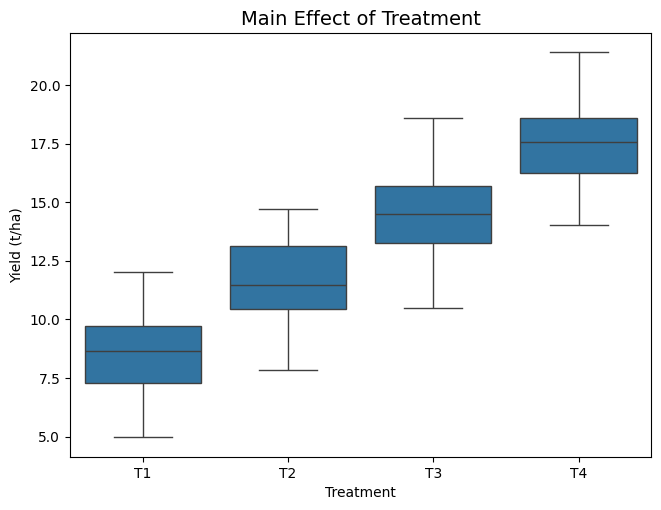

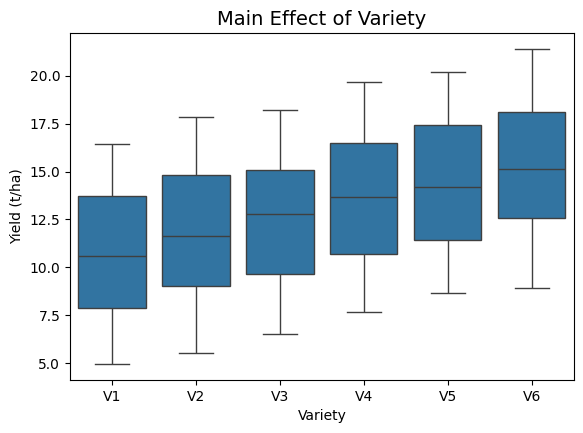

In [ ]:
# Boxplot for Treatment
plt.figure(figsize=(7.5, 5.5))
sns.boxplot(x='Treatment', y='Yield', data=exp_df)
plt.title('Main Effect of Treatment', fontsize=14)
plt.ylabel('Yield (t/ha)')
plt.xlabel('Treatment')
plt.show()

# Boxplot for Variety
plt.figure(figsize=(6.5, 4.5))
sns.boxplot(x='Variety', y='Yield', data=exp_df)
plt.title('Main Effect of Variety', fontsize=14)
plt.ylabel('Yield (t/ha)')
plt.xlabel('Variety')
plt.show()

## Two-way Repeated Measures ANOVA
For designs with repeated measures, we use `pingouin`'s `rm_anova`.

In [ ]:
# Two-way repeated measures ANOVA
rm_anova = pg.rm_anova(data=exp_df, dv='Yield', within=['Treatment', 'Variety'], subject='Replication')
print(rm_anova)

                Source           SS  ddof1  ddof2          MS             F  \
0            Treatment  1082.951150      3      9  360.983717  10911.068881   
1              Variety   226.992291      5     15   45.398458    815.951801   
2  Treatment * Variety     1.047134     15     45    0.069809      0.902441   

          p-unc     p-GG-corr       ng2       eps  
0  2.448140e-16  4.131129e-10  0.908524  0.579188  
1  1.037040e-17  2.457665e-08  0.675509  0.418498  
2  5.668663e-01  4.449345e-01  0.009512  0.113583  


/home/zia207/.pyenv/versions/3.11.11/lib/python3.11/site-packages/pingouin/distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


## Summary and Conclusion
This tutorial demonstrates how to perform ANOVA in Python using manual calculations and packages like `statsmodels` and `pingouin`. ANOVA is a powerful tool for comparing means across multiple groups, applicable in fields like psychology, biology, and economics. Always verify assumptions (normality, homogeneity of variances, independence) and use post-hoc tests to identify specific group differences. Effect sizes should also be considered for practical significance.

## Resources
1. [ANOVA in Python using Statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/anova.html)
2. [Pingouin: Statistics in Python](https://pingouin-stats.org/)
3. [ANOVA in Python: A Step-by-Step Guide](https://www.datacamp.com/tutorial/anova-in-python)